In [1]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
import numpy as np
import json
rc('text',
   usetex=True)
sns.set_style('ticks')
font = {
    'font.family':'Times New Roman',
    'font.weight': 200,
    'font.size': 10,
}
sns.set_style(font)
flatui = ['#002A5E', '#FD151B', '#8EBA42', '#348ABD', '#988ED5', '#BDB76B', '#8EBA42', '#FFB5B8']
sns.set_palette(flatui)
paper_rc = {
    'lines.linewidth': 2,
    'lines.markersize': 10,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.bf': 'Times New Roman:bold',
}
sns.set_context("paper", font_scale=2,  rc=paper_rc)
current_palette = sns.color_palette()

In [2]:
bar_width = .25
throughputs_file = '../oracle_throughputs.json'

In [3]:
with open(throughputs_file, 'r') as f:
    throughputs = json.load(f)

In [4]:
model_map = {
    'ResNet-18 (batch size 64)': 'ResNet-18',
    'ResNet-50 (batch size 128)': 'ResNet-50',
    'Transformer (batch size 64)': 'Transformer',
    'LM (batch size 20)': 'LM',
    'A3C': 'A3C',
    'CycleGAN': 'CycleGAN'
}
#'Recommendation (batch size 2048)': 'Recommendation',

In [5]:
k80 = []
for i in range(len(model_map.keys())):
    k80.append(1.0)

In [6]:
p100 = []
for model in sorted(model_map.keys()):
    p100.append(throughputs['p100'][model]['null'] / throughputs['k80'][model]['null'])

In [7]:
v100 = []
for model in sorted(model_map.keys()):
    v100.append(throughputs['v100'][model]['null'] / throughputs['k80'][model]['null'])

In [8]:
for model, p, v in zip(sorted(model_map.keys()), p100, v100):
    print('%s: Speedup on P100: %.2fx, Speedup on V100: %.2fx' % (model, p, v))

A3C: Speedup on P100: 1.24x, Speedup on V100: 2.15x
CycleGAN: Speedup on P100: 4.62x, Speedup on V100: 9.29x
LM (batch size 20): Speedup on P100: 3.56x, Speedup on V100: 4.96x
ResNet-18 (batch size 64): Speedup on P100: 3.98x, Speedup on V100: 6.31x
ResNet-50 (batch size 128): Speedup on P100: 3.65x, Speedup on V100: 9.60x
Transformer (batch size 64): Speedup on P100: 2.51x, Speedup on V100: 4.73x


In [9]:
r1 = np.arange(len(k80))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

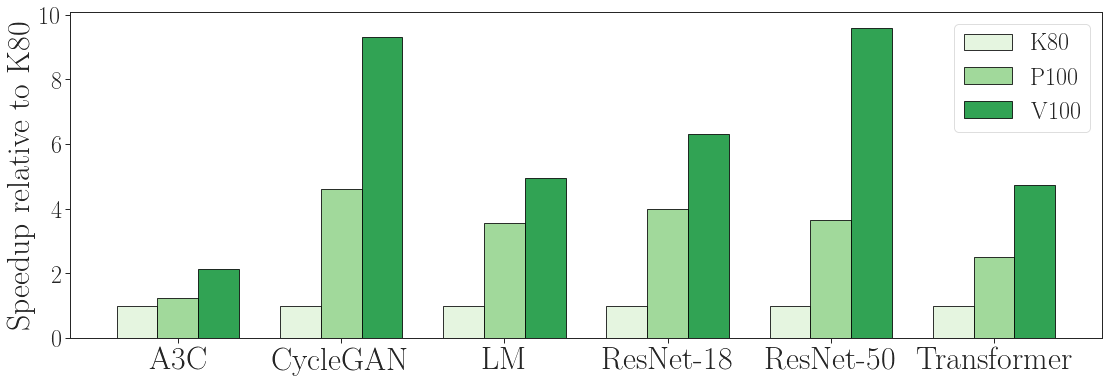

In [10]:
plt.bar(r1, k80, color='#e5f5e0', width=bar_width, edgecolor='black', label='K80')
plt.bar(r2, p100, color='#a1d99b', width=bar_width, edgecolor='black', label='P100')
plt.bar(r3, v100, color='#31a354', width=bar_width, edgecolor='black', label='V100')
plt.ylabel('Speedup relative to K80', fontsize=32)
plt.xticks([r + bar_width for r in range(len(k80))],
           [model_map[model] for model in sorted(model_map.keys())],
           fontsize=32)
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
fig = plt.gcf()
fig.set_size_inches(18.5, 6)
plt.show()

In [11]:
fig.savefig('heterogeneity.pdf', dpi=600, bbox_inches='tight')